In [ ]:
## for corelation
book = read(PdfFileReader)
book.getNumPages()
joined_text = for each(i) page:
    text = book.getPage(i).extractText()
    joined_text = text + '\n'
    #czyszczenie textu
name = nltk.corpus.names
names = name.words('male.txt') + name.words('female.txt')

#page vs name
for page in pages:
    text_stay
    persons = fun()

fun :
    # sentence clear text, tokenize, nltk.post_tag
    for sent in sentence:
        for chunk in nltk.ne_chunk(sen):
            if type(chunk) in nltk.treeTree:
                if chunk.label == 'PERSON'
                
#sentiment
text.lower()
blob = TextBlob(text)
sent = blob.sentiment.polarity

In [17]:
import PyPDF2
from collections import Counter
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import itertools
import networkx as nx
import numpy as np

In [2]:
stop = stopwords.words('english')

In [3]:
file = open('LOTR2.pdf', 'rb')

In [4]:
fileReader = PyPDF2.PdfFileReader(file)

In [26]:
d = dict()
sentiment = []
for i in range(fileReader.numPages):
    lowered_text = fileReader.getPage(i).extractText().lower()
    d = Counter(lowered_text.split(' ')) + Counter(d)
    sentiment.append(TextBlob(lowered_text).sentiment.polarity)

In [27]:
d.most_common()[:20]

[('hobbits', 2235),
 ('little', 1788),
 ('days', 1788),
 ('even', 1341),
 ('much', 1341),
 ('feet', 1341),
 ('seldom', 1341),
 ('men', 1341),
 ('people', 894),
 ('dwarves', 894),
 ('two', 894),
 ('four', 894),
 ('book', 894),
 ('records', 894),
 ('old', 894),
 ('concerned', 894),
 ('folk', 894),
 ('fond', 894),
 ('hair', 894),
 ('long', 894)]

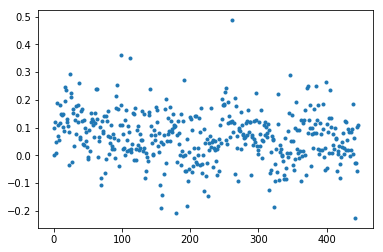

In [7]:
plt.plot(sentiment, '.')

In [ ]:
d = dict()
sentiment = []
for i in range(fileReader.numPages):
    lowered_text = fileReader.getPage(i).extractText().lower()
    words = [word for word in tokens if word.isalpha()]
    d = Counter([i for i in words if i not in stop]) + Counter(d)
    sentiment.append(TextBlob(lowered_text).sentiment.polarity)

In [33]:
characters = [line.rstrip().split(' ')[4] for line in open('characters.txt')]

In [38]:
def ie_preprocess(document):
    document = ' '.join([i for i in document.split() if i not in stop])
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

In [39]:
def extract_names_and_occurences(document):
    names = []
    sentences = ie_preprocess(document)
    for tagged_sentence in sentences:
    #    for chunk in nltk.ne_chunk(tagged_sentence):
        for word in tagged_sentence:
                #if type(chunk) == nltk.tree.Tree:
            if word[1] == 'NNP' and word[0] in characters:
                names.append(word[0])
    return names, list(dict.fromkeys(names))

In [49]:
d = dict()
occurences = []
for i in range(fileReader.numPages):
    names_and_occurences = extract_names_and_occurences(fileReader.getPage(i).extractText())
    d = Counter(names_and_occurences[0]) + Counter(d)
    occurences.append(names_and_occurences[1])

In [59]:
dict([(x[0],x[1]/fileReader.numPages) for x in list(d.most_common())])

{'Frodo': 2.422818791946309,
 'Gandalf': 1.0067114093959733,
 'Sam': 0.8903803131991052,
 'Bilbo': 0.7158836689038032,
 'Pippin': 0.46308724832214765,
 'Aragorn': 0.4541387024608501,
 'Strider': 0.4250559284116331,
 'Merry': 0.42058165548098436,
 'Ring': 0.348993288590604,
 'Boromir': 0.34451901565995524,
 'Tom': 0.28187919463087246,
 'Gimli': 0.2684563758389262,
 'Elrond': 0.25727069351230425,
 'Legolas': 0.21029082774049218,
 'Gollum': 0.14988814317673377,
 'Sauron': 0.1342281879194631,
 'Saruman': 0.11185682326621924,
 'Haldir': 0.09619686800894854,
 'Galadriel': 0.0894854586129754,
 'Isildur': 0.087248322147651,
 'Glorfindel': 0.08053691275167785,
 'Gluin': 0.07829977628635347,
 'Goldberry': 0.06935123042505593,
 'Bill': 0.06711409395973154,
 'Maggot': 0.06711409395973154,
 'Celeborn': 0.06487695749440715,
 'Gildor': 0.06263982102908278,
 'Balin': 0.05145413870246085,
 'Peregrin': 0.0447427293064877,
 'Nob': 0.042505592841163314,
 'Nimrodel': 0.035794183445190156,
 'Underhill': 0.0

KeyError: 'Ring'

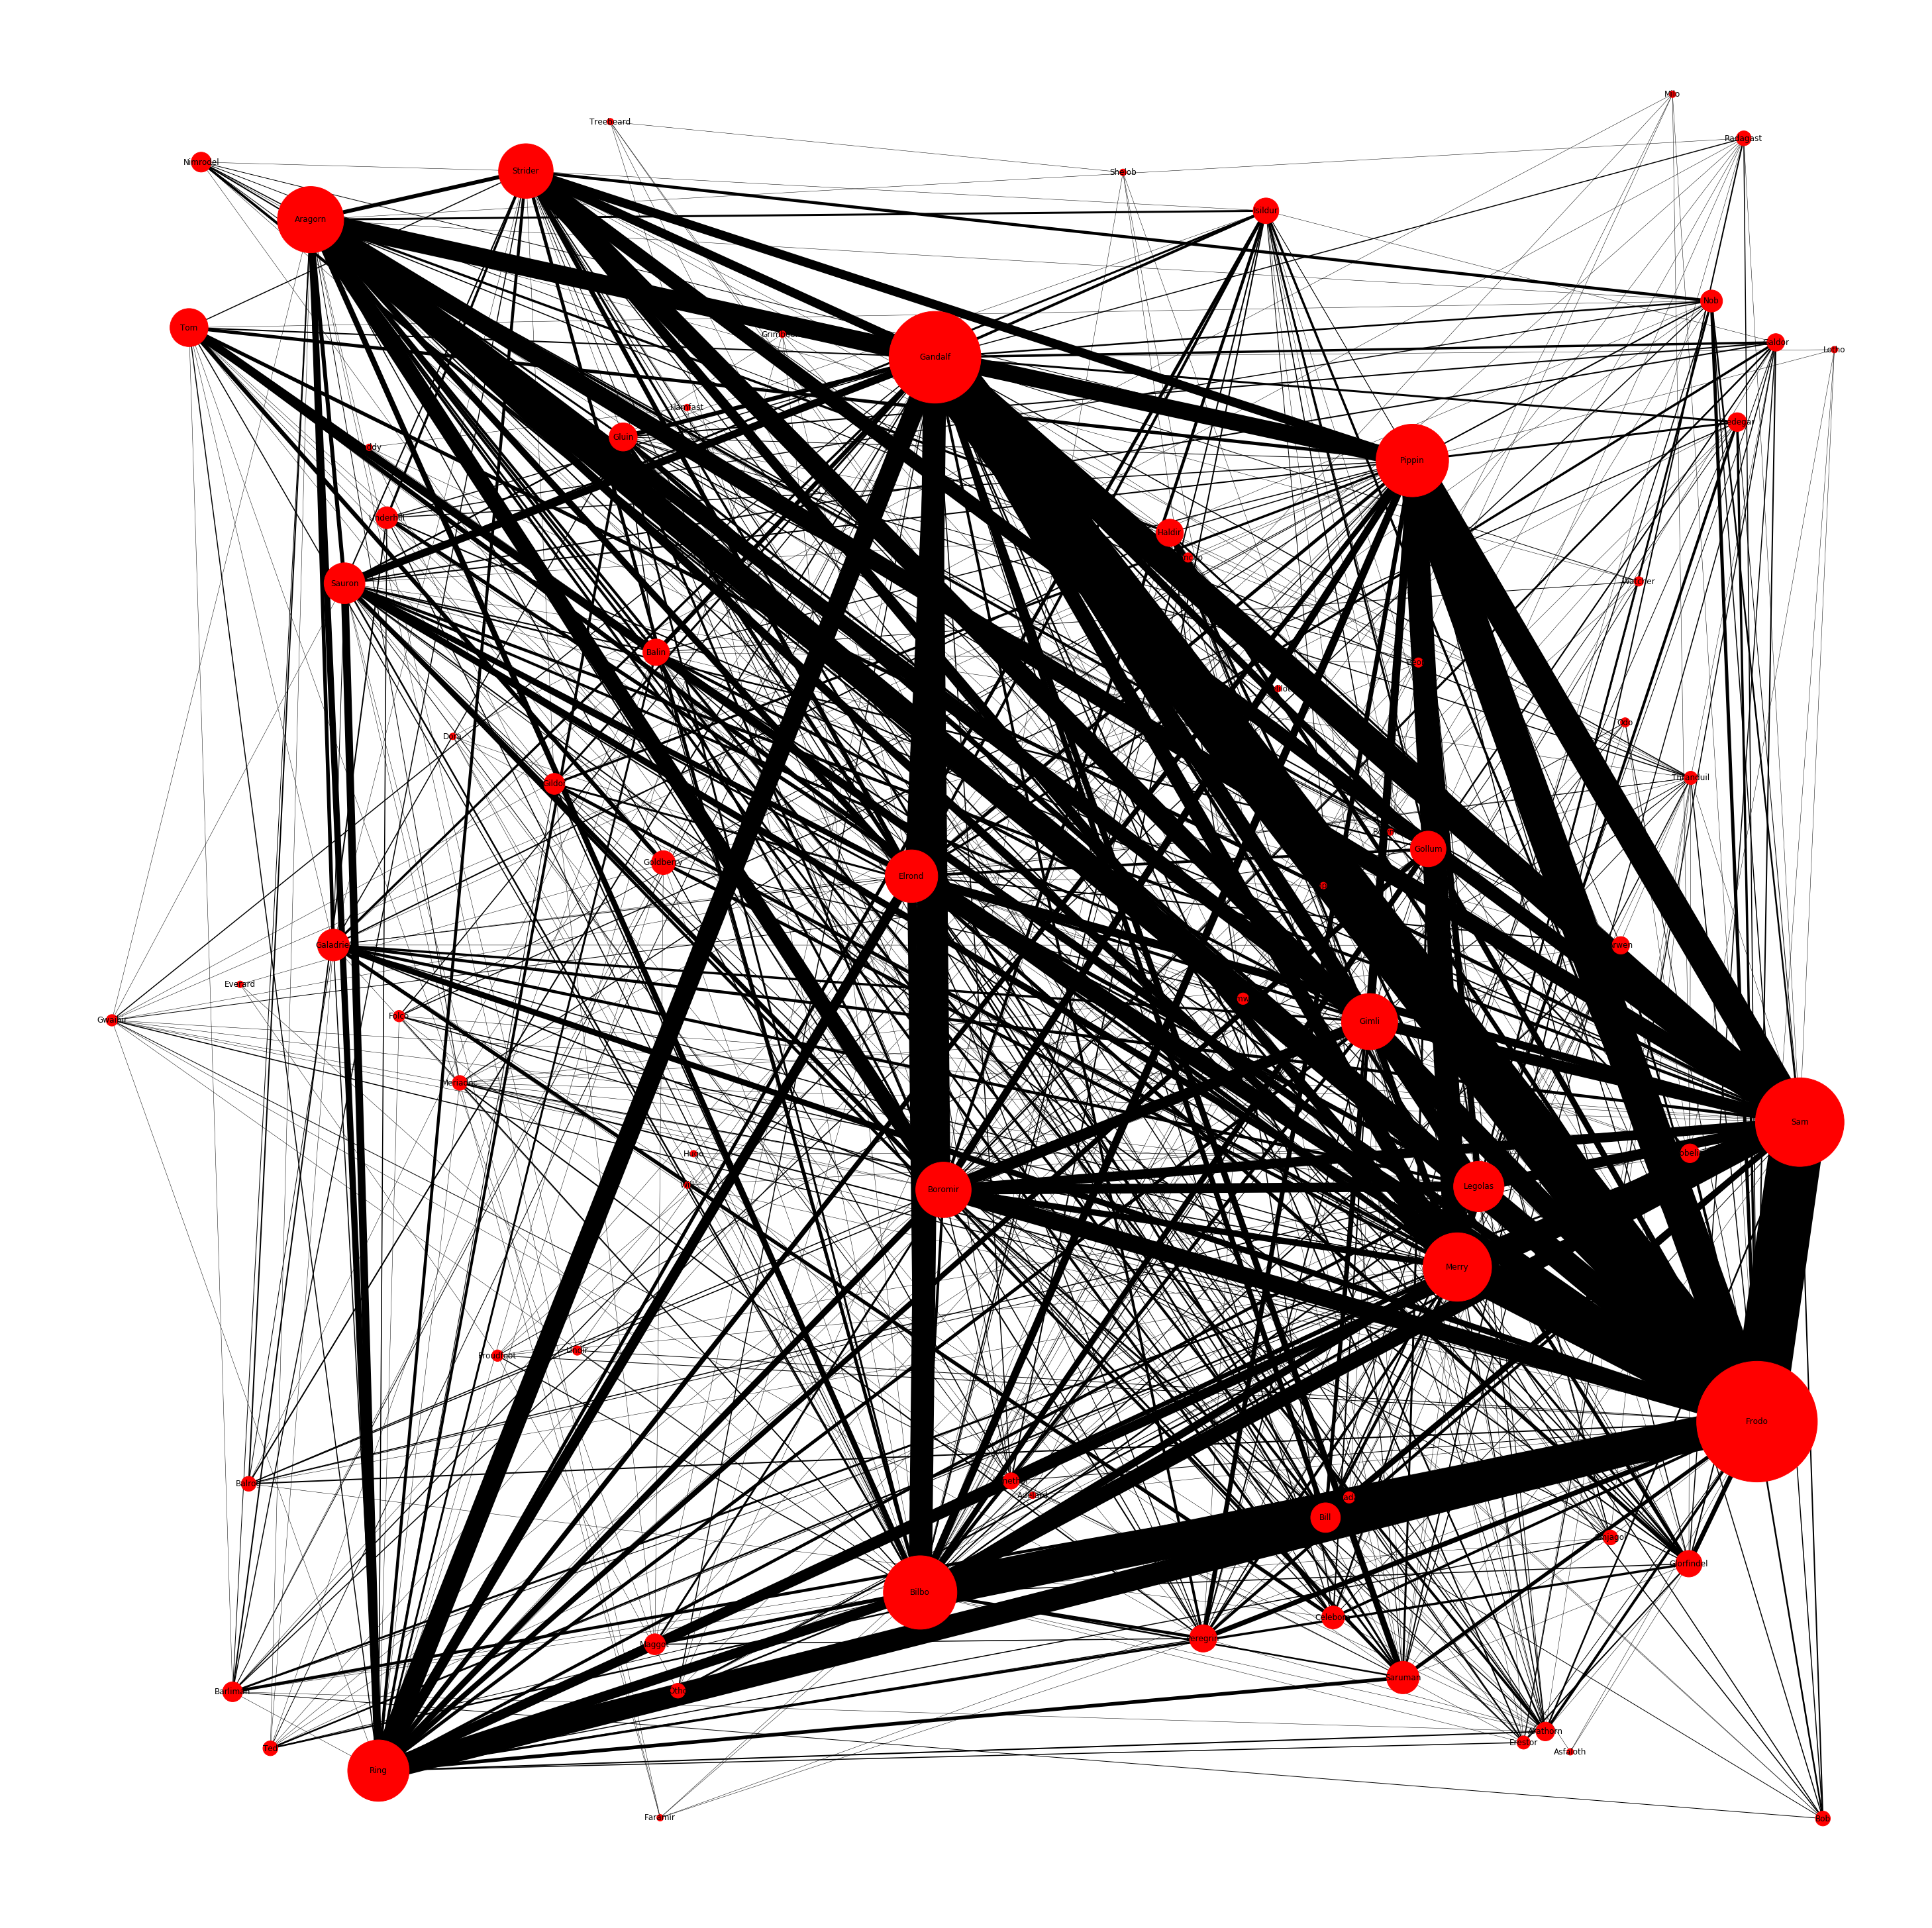

In [41]:
edges = []
for i in range(len(occurences)):
    for pair in itertools.combinations(occurences[i],2):
        edges.append(tuple(sorted(pair)))

edges_dict = Counter(edges)

nodes_dict = dict()
for i in range(len(occurences)):
    nodes_dict = Counter(occurences[i]) + Counter(nodes_dict)
    
G = nx.Graph()
G.add_nodes_from(list(nodes_dict.keys()))
list_of_edges = list(edges_dict.items())
for i in range(len(edges_dict)):
    edge = list_of_edges[i]
    G.add_edge(edge[0][0], edge[0][1], weight = edge[1]/2)
weights = [G[u][v]['weight'] for u,v in G.edges]

plt.figure(figsize=(40,40))
nx.draw_random(G, with_labels=True, node_size = np.multiply(list(nodes_dict.values()),100), width = weights)
plt.savefig('network.png')
node_pos=nx.get_node_attributes(G,'pos')
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edges(G, node_pos)
nx.draw_networkx_edge_labels(G,node_pos,edge_labels=edge_labels)

plt.show()

In [64]:
def get_occurences(document):
    names = []
    sentences = ie_preprocess(document)
    for tagged_sentence in sentences:
        for word in tagged_sentence:
            if word[1] == 'NNP' and word[0] in characters:
                names.append(word[0])
    return list(dict.fromkeys(names))

In [74]:
occurences = [get_occurences(fileReader.getPage(i).extractText()) for i in range(fileReader.numPages)]

In [123]:
def extract_names2(document):
    names = []
    sentences = ie_preprocess(document)
    for tagged_sentence in sentences:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                if chunk.label() == 'PERSON':
                    names.append(' '.join([c[0] for c in chunk]))
    return names